<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Graphes_Parcours_en_profondeur_(DFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphes - Parcours en profondeur (DFS)**

Dans ce chapitre, nous allons découvrir comment **parcourir un graphe ou un arbre** en partant d'un sommet source, et en explorant tous les chemins possibles. Notre objectif sera de déterminer s'il existe un chemin reliant tous les sommets.

La méthode que nous allons étudier est l'algorithme du parcours en profondeur, appelé aussi **DFS** pour Depth First Search. L'idée derrière cet algorithme est de parcourir un graphe ou un arbre en partant d'un sommet source, puis d'emprunter un chemin aléatoire jusqu'à atteindre un sommet déjà visité ou un cul-de-sac. On revient alors sur le dernier sommet (**backtrack**) où on pouvait suivre un autre chemin que l'on expore, jusqu'à ce que tous les sommets aient été visités.

Voici un graphe qui illustrera le propos :

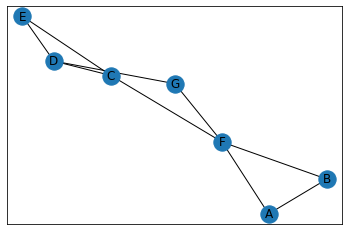

In [2]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

import networkx as nx

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Admettons que l'on cherche à connaitre tous les sommets que l'on peut atteindre à partir du sommet 'A' (appelé sommet source).

Voici l'algorithme **DFS** appliqué à notre graphe :

Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)


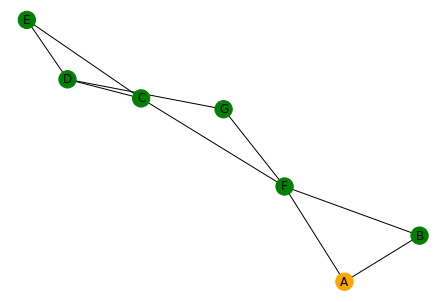

Traitement du noeud F qui prend la couleur 'orange' (en cours d'examination)


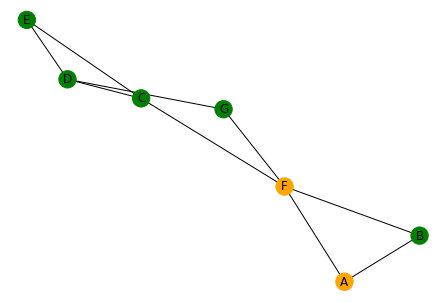

Traitement du noeud B qui prend la couleur 'orange' (en cours d'examination)


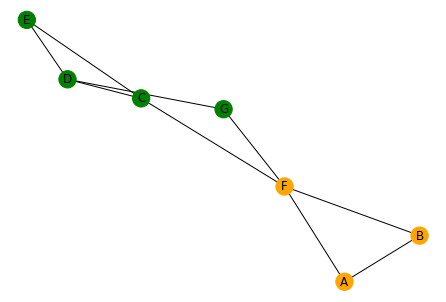

B est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


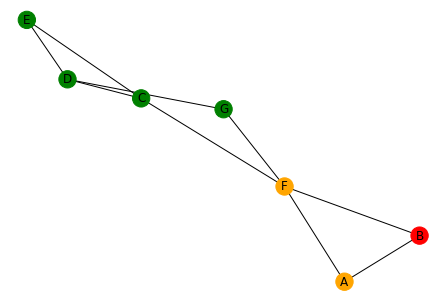

Traitement du noeud C qui prend la couleur 'orange' (en cours d'examination)


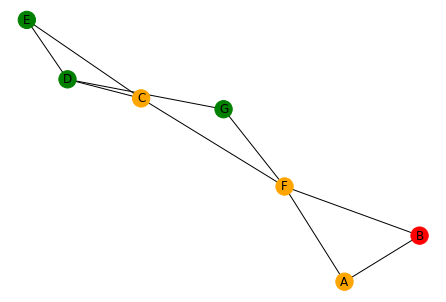

Traitement du noeud D qui prend la couleur 'orange' (en cours d'examination)


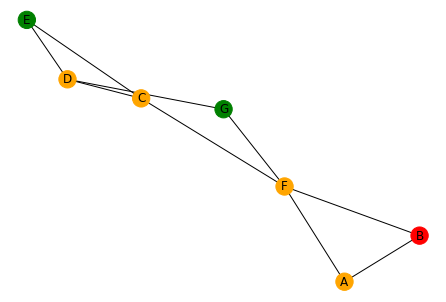

Traitement du noeud G qui prend la couleur 'orange' (en cours d'examination)


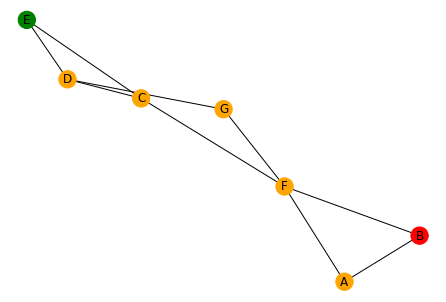

G est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


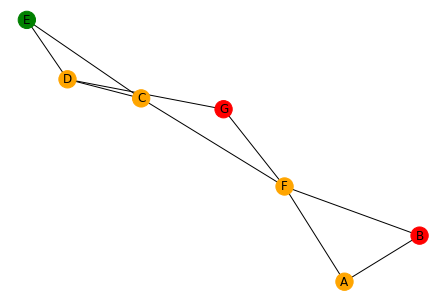

Traitement du noeud E qui prend la couleur 'orange' (en cours d'examination)


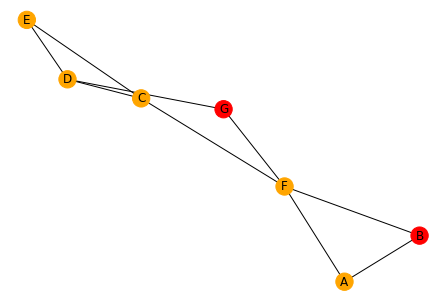

E est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


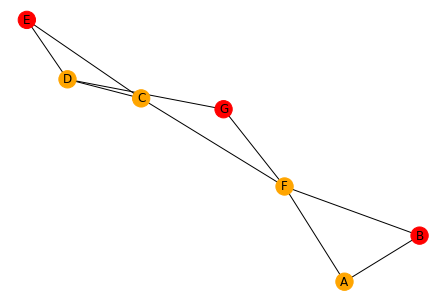

D est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


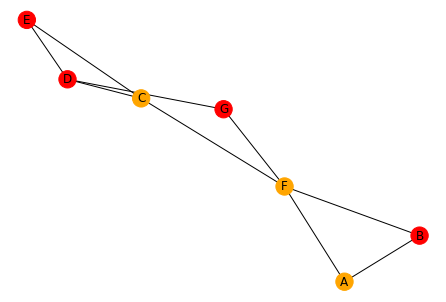

C est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


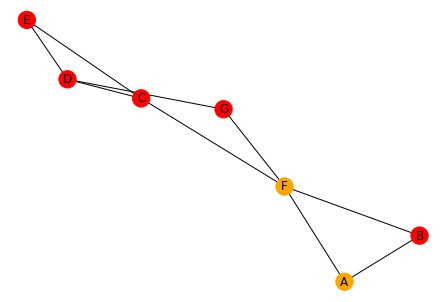

F est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


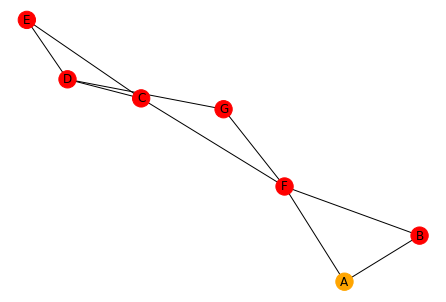

A est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré


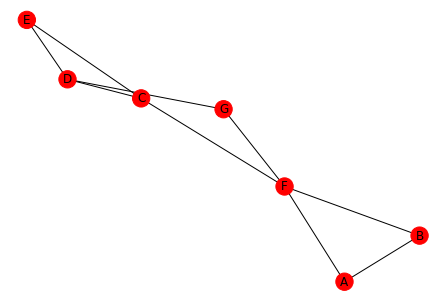

Fin du traitement : tous les sommets ont été examinés
Liste des arêtes qui peuvent être parcourues à partir du sommet A : {'A': None, 'F': 'A', 'B': 'F', 'C': 'F', 'D': 'C', 'G': 'D', 'E': 'D'}


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

G = nx.Graph(D)

def dfs(G,s) :
  couleur=dict()
  for v in G :couleur[v]='green'
  P=dict()
  P[s]=None
  couleur[s]='orange'
  Q=[s]

  # Affichage du graphe
  print("Initialisation du noeud A qui prend la couleur 'orange' (en cours d'examination)")
  color_map=[]
  for i in G:
    color_map.append(couleur[i])
  nx.draw(G, pos, node_color=color_map, with_labels=True, arrows = False)
  plt.show()

  while Q :
    u=Q[-1]
    R=[y for y in G[u] if couleur[y]=='green']
    if R :
      v=R[0]
      couleur[v]='orange'
      P[v]=u
      Q.append(v)

      # Affichage du graphe
      print('Traitement du noeud',v,"qui prend la couleur 'orange' (en cours d'examination)")
      color_map=[]
      for i in G:
        color_map.append(couleur[i])
      nx.draw(G, pos, node_color=color_map, with_labels=True, arrows = False)
      plt.show()

    else :
      Q.pop()
      couleur[u]='red'

      # Affichage du graphe
      print(u,"est un cul de sac, il prend la couleur 'rouge' (examiné) et on continue le parcours en revenant au sommet précédemment exploré")
      color_map=[]
      for i in G:
        color_map.append(couleur[i])
      nx.draw(G, pos, node_color=color_map, with_labels=True, arrows = False)
      plt.show()
  
  print('Fin du traitement : tous les sommets ont été examinés')
  return P

P = dfs(G,'A')
print("Liste des arêtes qui peuvent être parcourues à partir du sommet A :",P) # On affiche toutes les arêtes dans l'ordre de parcours, en partant du sommet 'A'

Nous obtenons alors un chemin permettant de relier chaque sommet au sommet source 'A'.

Nous remarquons que si l'on ne conserve que les arêtes qui composent ce chemin, cela nous donne un arbre couvrant :

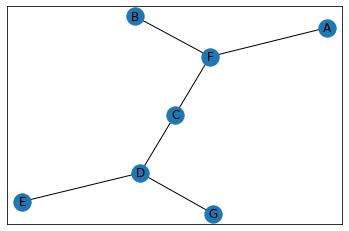

In [7]:
G = nx.Graph()

for i in P:
  if P[i]!=None:
    G.add_edge(i,P[i])

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

l'algorithme **dfs** sert en particulier à déterminer si le graphe contient un **arbre couvrant** et donc s'il est **connexe**.

Le même résultat peut être obtenu sans recoder la fonction bfs, mais en utilisant les fonctions du module NetworkX.

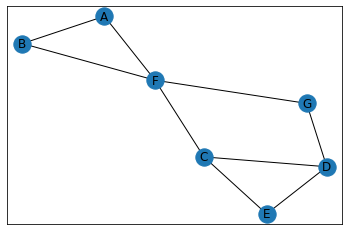

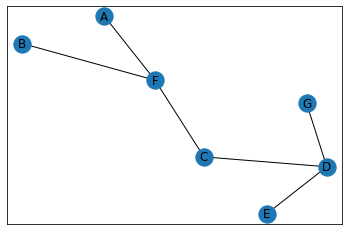

[('A', 'F'), ('F', 'B'), ('F', 'C'), ('C', 'D'), ('D', 'G'), ('D', 'E')]


In [9]:
D = dict()
D['A'] = {'B','F'}
D['B'] = {'A','F'}
D['C'] = {'D','E','F'}
D['D'] = {'C','E','G'}
D['E'] = {'C','D'}
D['F'] = {'A','B','C','G'}
D['G'] = {'D','F'}

import networkx as nx

G = nx.Graph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gdfs = nx.Graph(nx.dfs_tree(G,'A'))

nx.draw_networkx_nodes(Gdfs, pos)
nx.draw_networkx_labels(Gdfs, pos)
nx.draw_networkx_edges(Gdfs, pos)

plt.show()

print(list(nx.dfs_edges(G,'A')))

Toutes les méthodes vues ici fonctionnent aussi sur des **graphes orientés**.

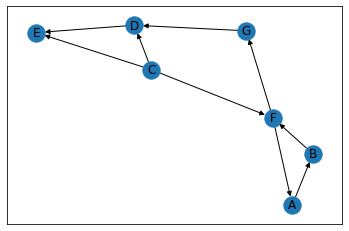

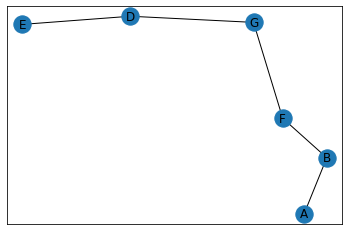

[('A', 'B'), ('B', 'F'), ('F', 'G'), ('G', 'D'), ('D', 'E')]


In [10]:
D = dict()
D['A'] = {'B'}
D['B'] = {'F'}
D['C'] = {'D','E','F'}
D['D'] = {'E'}
D['E'] = {}
D['F'] = {'A','G'}
D['G'] = {'D'}

import networkx as nx

G = nx.DiGraph(D)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Gdfs = nx.Graph(nx.dfs_tree(G,'A'))

nx.draw_networkx_nodes(Gdfs, pos)
nx.draw_networkx_labels(Gdfs, pos)
nx.draw_networkx_edges(Gdfs, pos)

plt.show()

print(list(nx.dfs_edges(G,'A')))

Notons que dans cet exemple, le sommet 'C' ne peut être atteint par aucun chemin. Il disparait alors de l'arbre obtenu.